### Car Price Prediction 

#### Import Necessary Library

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

#### Import the Dataset

In [18]:
data=pd.read_csv("D:/repository/car_price_prediction/Car_Price_Prediction/CarPrice_Assignment.csv")
print(data.head())
print(data.shape)

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

#### EDA

##### Check for missing value

In [8]:
print(data.isnull().sum())

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [9]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [35]:
#Drop the carID
data=data.drop(columns=["car_ID"])

#### Remove Duplicate carname

In [37]:
print(data["CarName"].unique())

['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick skyhawk' 'buick opel isuzu 

In [38]:
#Keep only the first half of the word
data["CarName"]=data["CarName"].str.split(" ",expand=True)[0]
print(data["CarName"].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


In [41]:
#We need to replace some of the typos
data["CarName"]=data["CarName"].replace({"maxda":"mazda","nissan":"Nissan","porcshce":"porsche","toyouta":"toyota",'vokswagen': 'volkswagen', 'vw': 'volkswagen'})
print(data["CarName"].unique())
#Check for duplicate
data.duplicated().sum().sum()

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


0

#### Identify all Numerical Data

In [42]:
numerical=data.select_dtypes(["number"]).columns
print("Numerical Data:",list(numerical))

Numerical Data: ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


#### Identify all Categorical Data

In [43]:
categorical=data.columns.difference(numerical)
data[categorical]=data[categorical].astype("object")
print(data[categorical])
print("Categoraial Data:",list(categorical))

         CarName aspiration      carbody cylindernumber doornumber drivewheel  \
0    alfa-romero        std  convertible           four        two        rwd   
1    alfa-romero        std  convertible           four        two        rwd   
2    alfa-romero        std    hatchback            six        two        rwd   
3           audi        std        sedan           four       four        fwd   
4           audi        std        sedan           five       four        4wd   
..           ...        ...          ...            ...        ...        ...   
200        volvo        std        sedan           four       four        rwd   
201        volvo      turbo        sedan           four       four        rwd   
202        volvo        std        sedan            six       four        rwd   
203        volvo      turbo        sedan            six       four        rwd   
204        volvo      turbo        sedan           four       four        rwd   

    enginelocation enginety

### Find all the unique value in the categorical Data

In [44]:
for i in data[categorical].columns:
    print(i)
    print(data[i].unique())

CarName
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']
aspiration
['std' 'turbo']
carbody
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
cylindernumber
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
doornumber
['two' 'four']
drivewheel
['rwd' 'fwd' '4wd']
enginelocation
['front' 'rear']
enginetype
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
fuelsystem
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
fueltype
['gas' 'diesel']


In [45]:
cat=['aspiration', 'carbody', 'cylindernumber', 'doornumber', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem', 'fueltype']

### Data Visualization

#### Car companies distribution

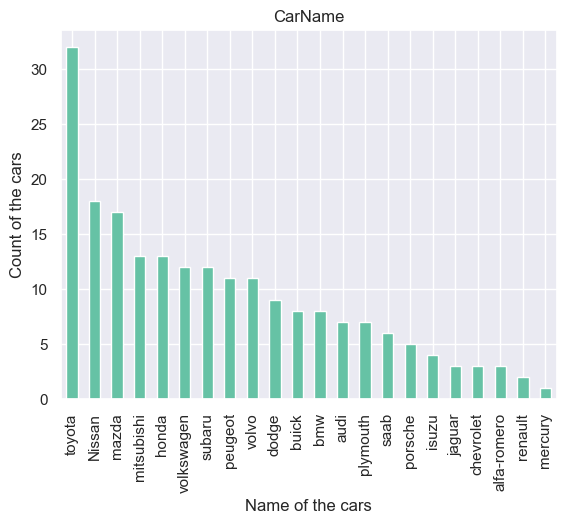

In [49]:
ax=data["CarName"].value_counts().plot(kind='bar',stacked=True,colormap='Set2')
ax.title.set_text("CarName")
plt.xlabel("Name of the cars")
plt.ylabel("Count of the cars")
plt.show()

#### Price Distribution of the cars

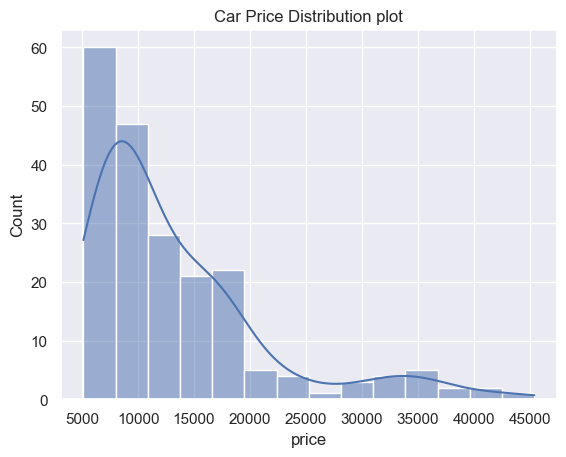

In [47]:
plt.title("Car Price Distribution plot")
sns.histplot(data['price'],kde=True)
plt.show()

#### Heat Map

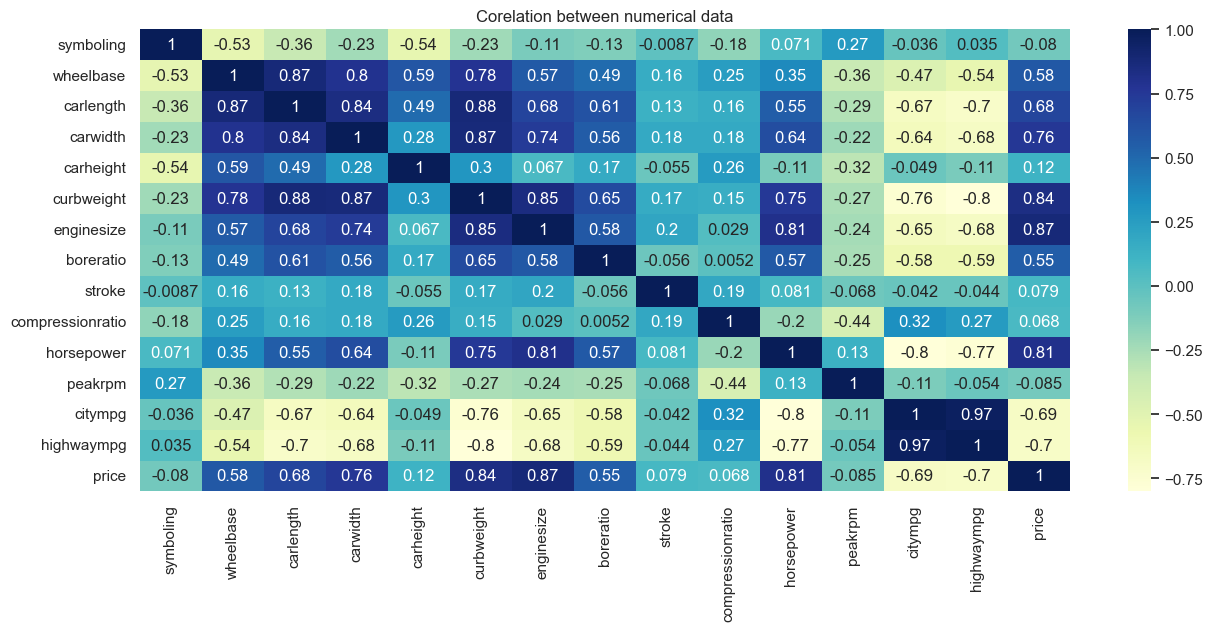

In [46]:
def heatmap(df,title):
    plt.figure(figsize=(15,6))
    #sns.set(font_scale=1)
    sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
    plt.title(title)
    plt.show()
    return

heatmap(data[numerical],"Corelation between numerical data")


#### Visualization of the numerical variable

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg'],
      dtype='object')


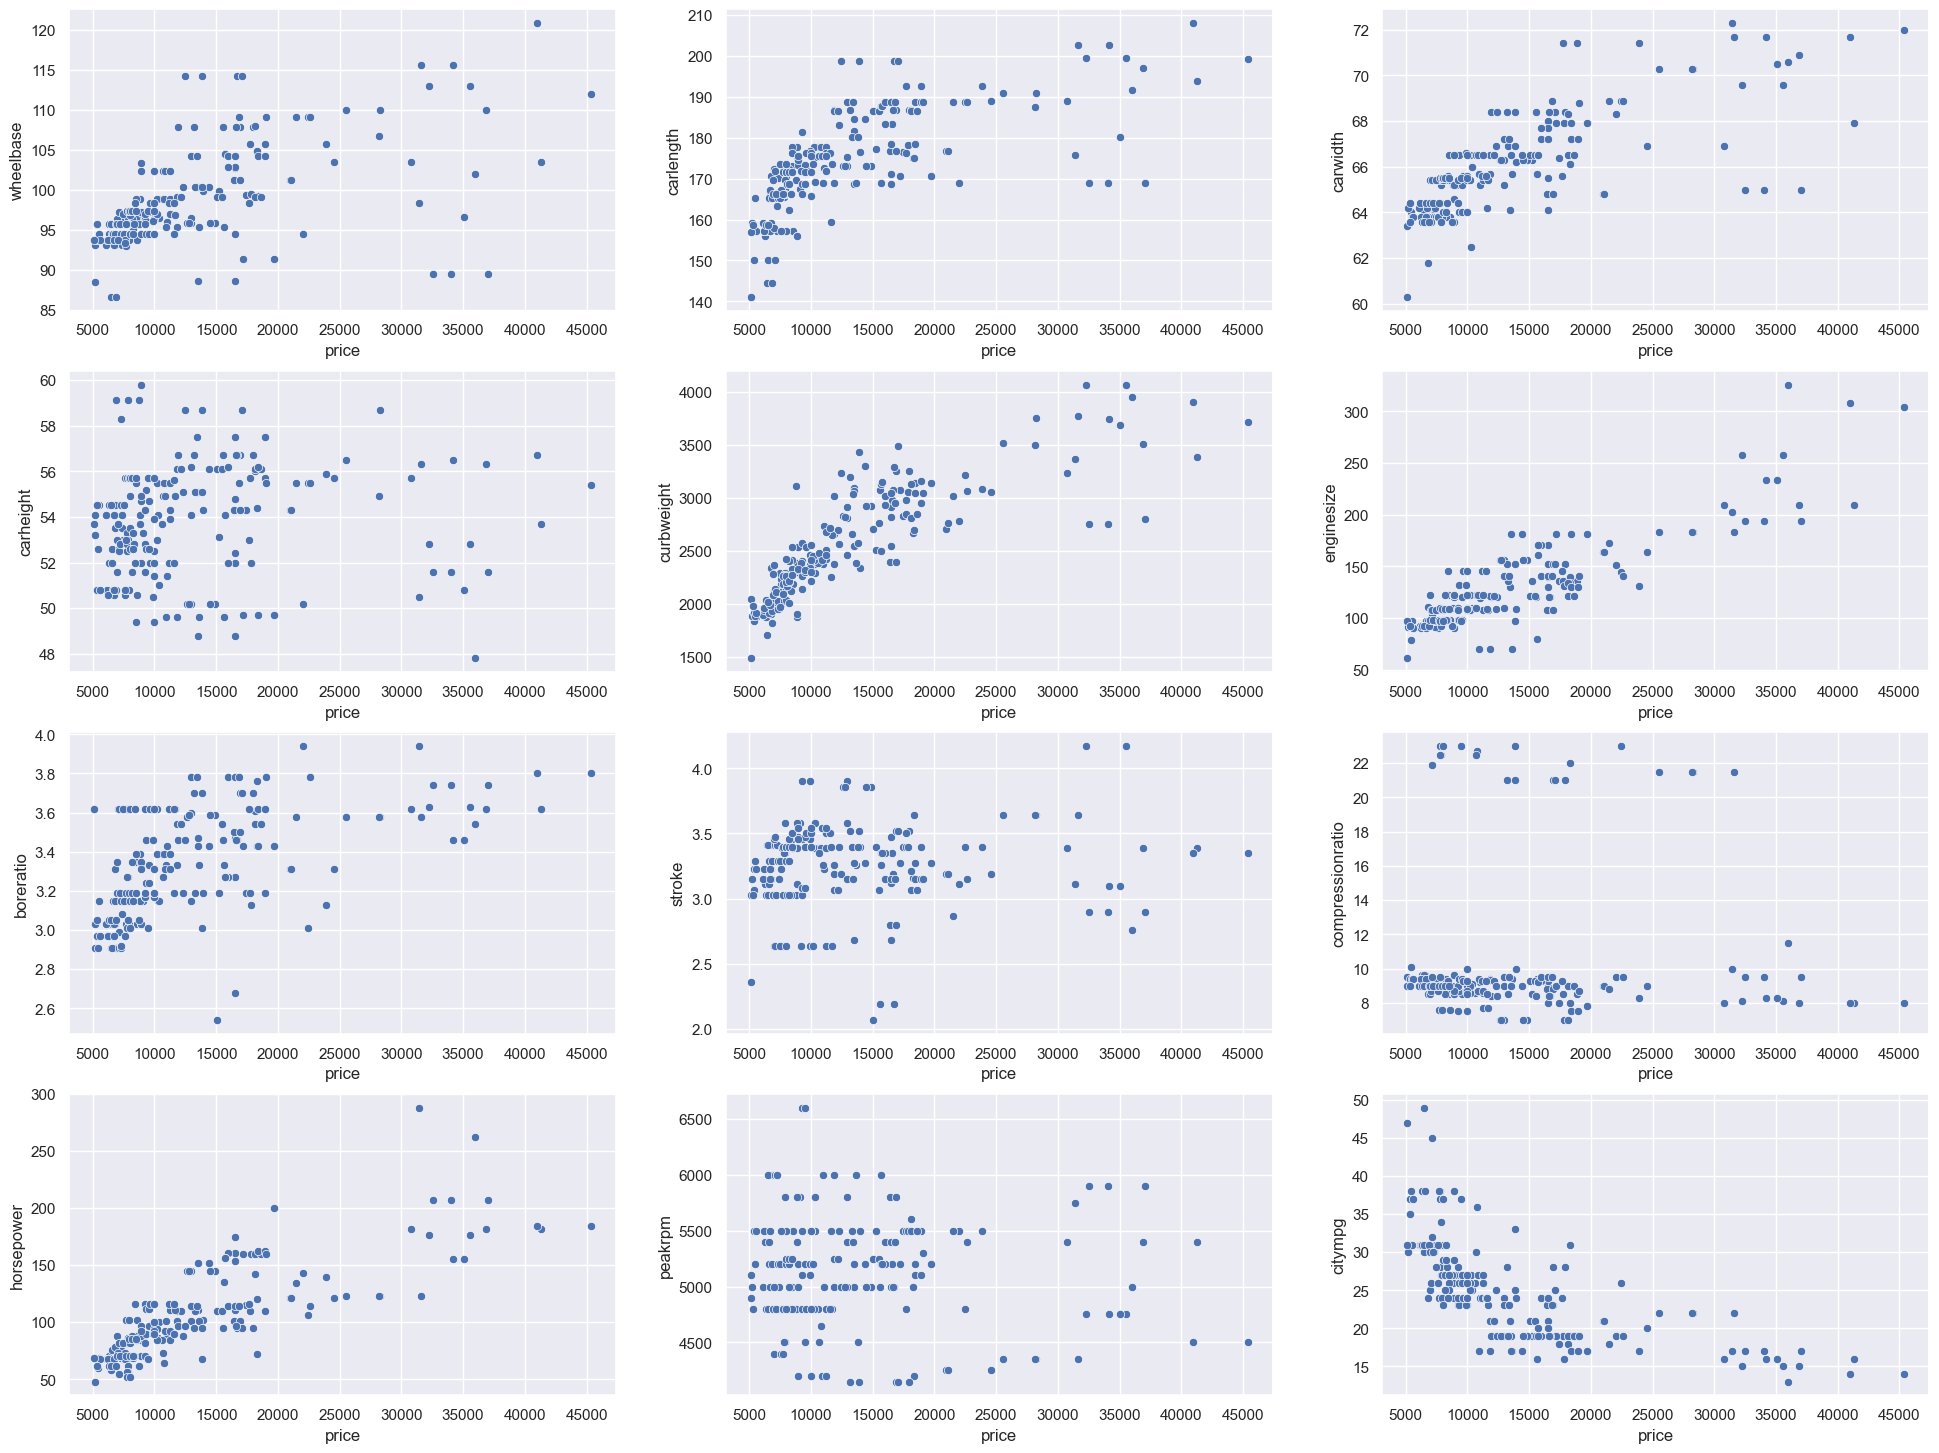

In [57]:
data[numerical]
fig,axes=plt.subplots(4,3, figsize=(24,18))
#Transform 2D axes into 1D using Flatten() making loop through the subplot easlier
axes=axes.flatten()
feature=data[numerical].columns[1:-2]
print(feature)
for i in range(len(feature)):
    sns.scatterplot(x="price",y=feature[i],data=data,ax=axes[i])


#### Visualization of categorical Variable

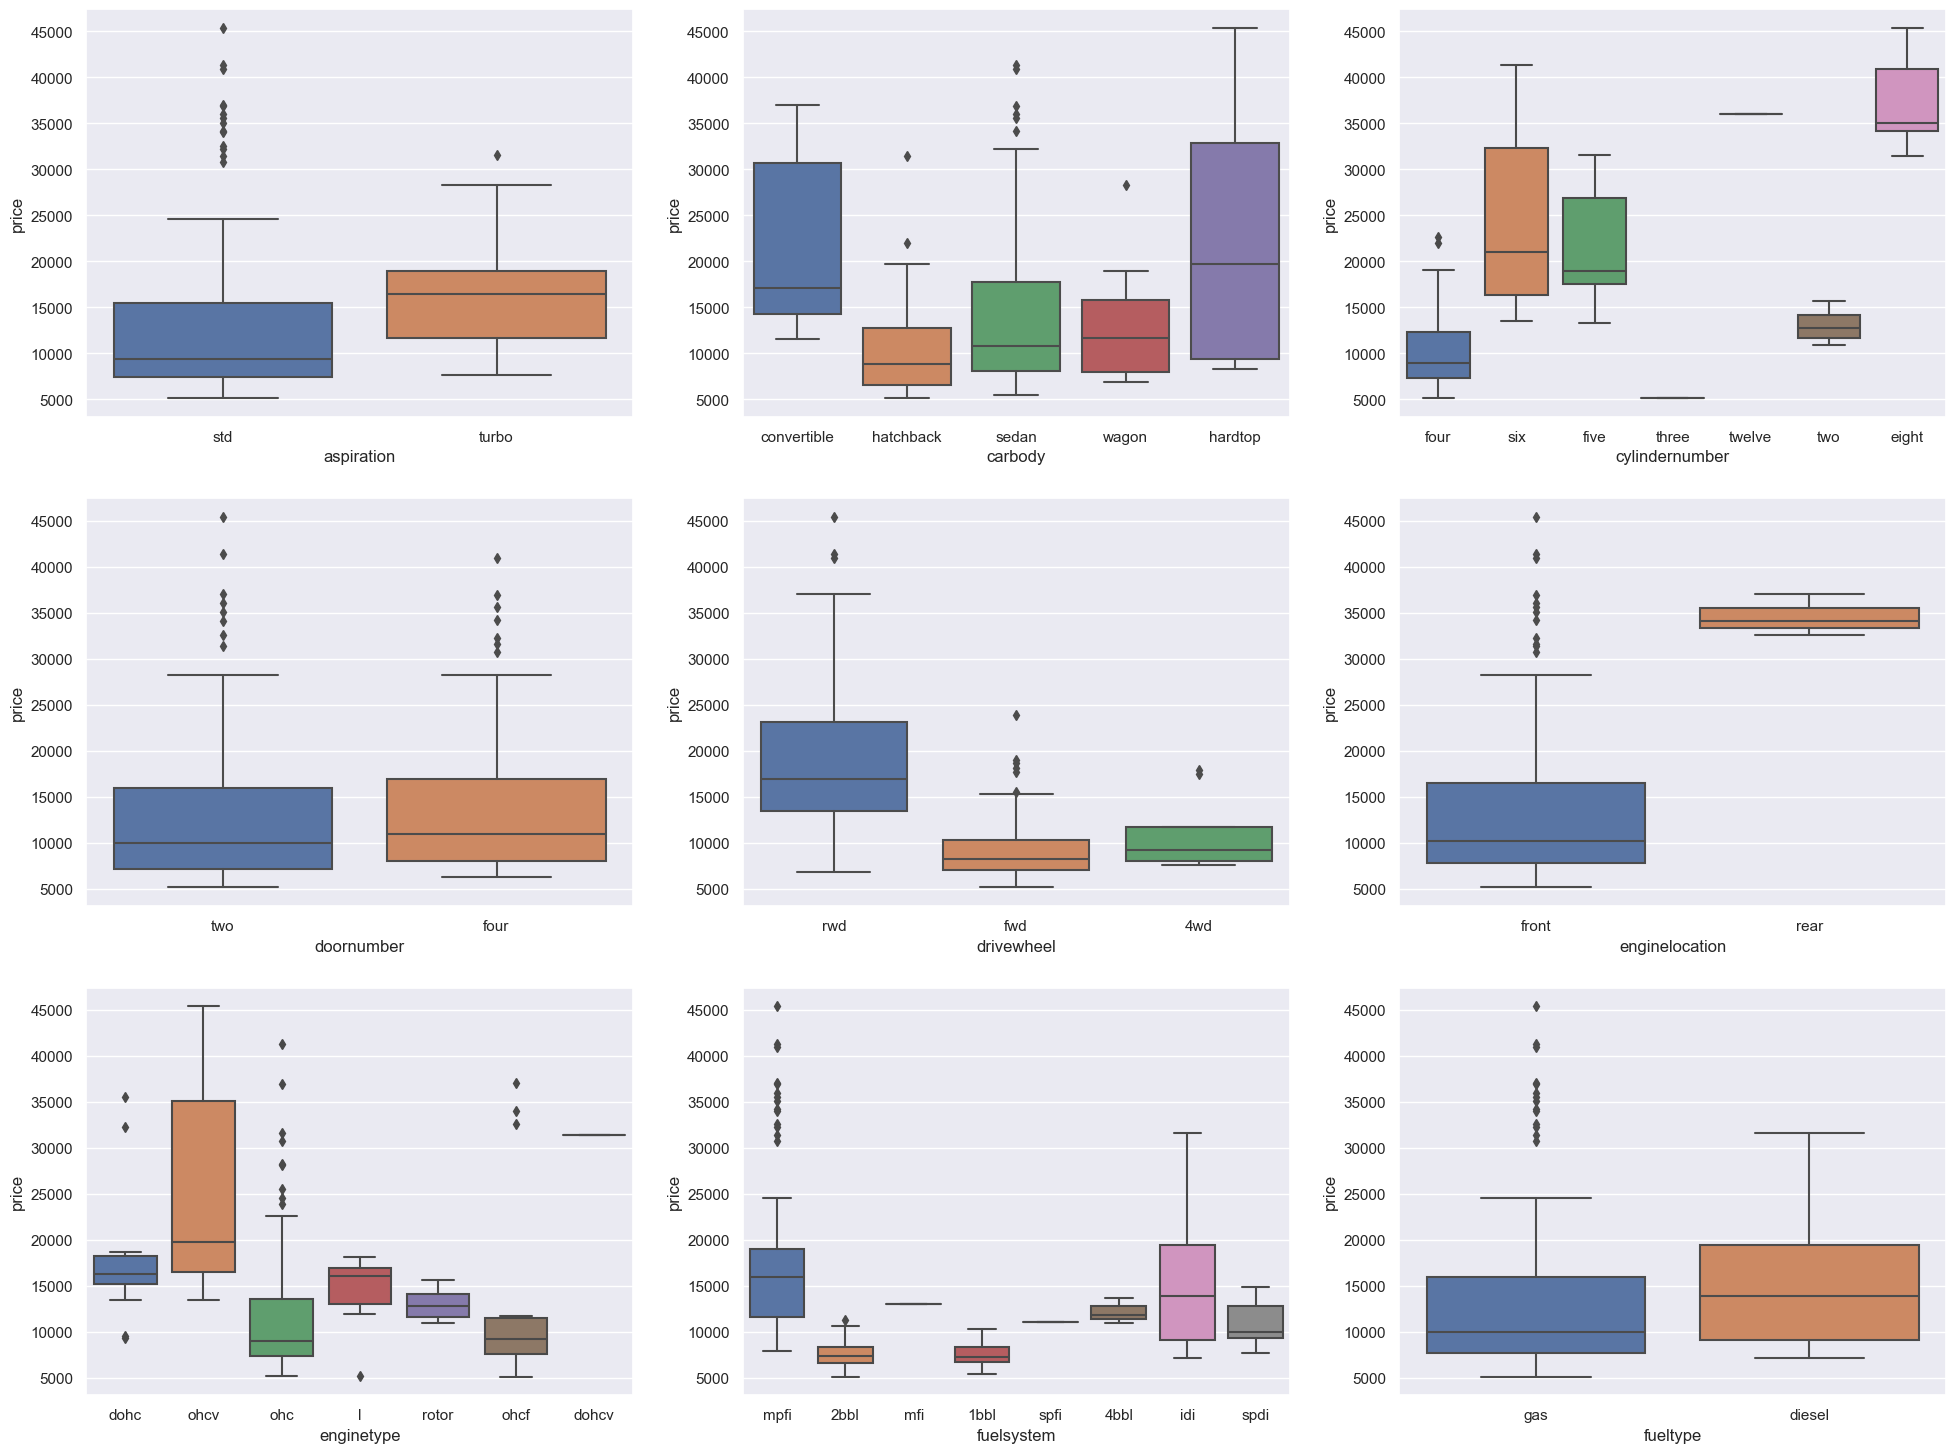

In [60]:
fig,axes=plt.subplots(3,3,figsize=(24,18))
axes=axes.flatten()
feature=data[categorical].columns[1:]
for i in range(len(feature)):
    sns.boxplot(x=feature[i],y='price',data=data,ax=axes[i])

### Data PreProcessing

#### Label Encoding

In [31]:
#Perform Label encoding
le=p


     aspiration_std  aspiration_turbo  carbody_convertible  carbody_hardtop  \
0              True             False                 True            False   
1              True             False                 True            False   
2              True             False                False            False   
3              True             False                False            False   
4              True             False                False            False   
..              ...               ...                  ...              ...   
200            True             False                False            False   
201           False              True                False            False   
202            True             False                False            False   
203           False              True                False            False   
204           False              True                False            False   

     carbody_hatchback  carbody_sedan  carbody_wago